# Multiclass logistic regression from scratch
*Math and gradient decent implementation in Python*

Video: https://youtu.be/wY3PJGZEyY4

Multiclass logistic regression is also called multinomial logistic regression and softmax regression. It is used when we want to predict more than 2 classes. A lot of people use multiclass logistic regression all the time, but don't really know how it works. So, I am going to walk you through how the math works and implement it using gradient descent from scratch in Python. 

Disclaimer: there are various notations on this topic. I am using the notation that I think is easy to understand and visualize. You may find other notations in other places such as matrices and vectors being transposed.

## Problem statement 
Let's assume we have N people/observations, each person has M features, and they belong to C classes. We are given: 
- A matrix $X$ is $\mathbb{R}^{N\times M}$. $X_{ij}$ represents person i with feature j.
- A vector $Y$ is $\mathbb{R}^{N}$. $Y_{i}$ represents person i belonging to class k.

We do not know:
- The weight matrix $W$ is $\mathbb{R}^{M\times C}$.$W_{jk}$ represents the weights for feature j and class k.

We want to figure out $W$ and use $W$ to predict the class membership of any given observation X. 

## Multiclass logistic regression workflow
If we know $X$ and $W$ (let's say we give $W$ initial values of all 0s for example), Figure 1 shows the workflow of multiclass logistic regression forward path. 
- First, we calculate the product of $X$ and $W$, here we let $Z = -XW$. 
    - Sometimes people don't include a negative sign here. It doesn't matter if there is a negative sign here or not. 
    - Sometimes we would also add a bias term. For simplicity, let's only look at the weights in this article.
- Second, we take the softmax for each row $Z_{i}$: $P_{i} = $softmax$(Z_{i}) = \frac{exp(Z_{i})}{\sum_{k=0}^{C} exp(Z_{ik})}$.Each row of $Z_{i}$ should be the product of each row of $X$ (i.e., $X_{i}$) and the entire matrix of $W$. Now each row of $P$ should add up to 1.
- Third, we take the argmax for each row and find the class with the highest probability.


![](f1.png)
*Figure 1. Multiclass logistic regression forward path.*

<!-- <figure>
  <img src="f1.png" width="600">
    <figcaption><i>Figure 1. Multiclass logistic regression forward path.</i></figcaption>
</figure>
 -->
Figure 2 shows another view of the multiclass logistic regression forward path when we only look at one observation at a time:
- First, we calculate the product of $X_i$ and W, here we let $Z_i = -X_iW$. 
- Second, we take the softmax for this row $Z_{i}$: $P_{i} = $softmax$(Z_{i}) = \frac{exp(Z_{i})}{\sum_{k=0}^{C} exp(Z_{ik})}$.
- Third, we take the argmax for this row $P_{i}$ and find the index with the highest probability as $Y_i$.


![](f2.png)
*Figure 2. Operation on one row.*
<!-- <figure>
  <img src="f2.png" width="600">
    <figcaption><i>Figure 2. Operation on one row.</i></figcaption>
</figure>
 -->
### Likelihood

Recall that in the problem statement that we said we are given $Y$. So for a given observation, we know the class of this observation, which is $Y_i$. The likelihood function of $Y_i$ given $X_i$ and $W$ is the probability of observation i and class $k=Y_i$, which is the softmax of $Z_{i, k=Y_i}$. And the likelihood function of $Y$ given $X$ and $W$ is the product of all the observations. Figure 3 helps us understand this process from $Y_i$ trace backward to $W_{k=Y_i}$




- $p(Y_i|X_i, W) = P_{i, k=Y_i} = $ softmax$(Z_{i, k=Y_i}) = \frac{exp(Z_{i,k=Y_i})}{\sum_{k=0}^{C} exp(Z_{ik})} = \frac{\exp(-X_{i}W_{k=Y_i})}{\sum_{k=0}^{C} \exp(-X_{i}W_{k})}$
- $p(Y|X, W) = \prod_{i=1}^{N}\frac{\exp(-X_{i}W_{k=Y_i})}{\sum_{k=0}^{C} \exp(-X_{i}W_{k})} $


![](f3.png)
*Figure 3. Calculate likihood.*
<!-- <figure>
  <img src="f3.png" width="600">
    <figcaption><i>Figure 3. Calculate likihood.</i></figcaption>
</figure>
 -->

### Loss function / negative log-likelihood:

Next, we calculate the loss function. We use the negative log-likelihood function and normalized it by the sample size. One thing to note here is that $W_{k=Y_i} = WY^T_{i(onehot\_encoded)}$ and $\sum_{i=1}^{N}X_iW_{k=Y_i} = Tr(XWY^T_{onehot\_encoded})$. $Tr$ means the sum of elements on the main diagonal.


![](f5.png)
*Figure 4. Matrix calculations.*
<!-- <figure>
  <img src="f5.png" width="800">
    <figcaption><i>Figure 4. Matrix calculations.</i></figcaption>
</figure>

 -->

$l(W) $

$= -\frac{1}{N}\log p(Y|X, W) $

$= \frac{1}{N}(\sum_{i=1}^{N}(X_iW_{k=Y_i} + \log {\sum_{k=0}^{C} \exp(-X_{i}W_{k})})) $

$= \frac{1}{N}(\sum_{i=1}^{N}(X_iW_{k=Y_i} + \sum_{i=1}^{N}\log {\sum_{k=0}^{C} \exp(-X_{i}W_{k})}) $

To write loss in matrix form: 

$l(W) $

$= \frac{1}{N}(\sum_{i=1}^{N}(X_iWY^T_{i(onehot\_encoded)}) + \sum_{i=1}^{N}\log {\sum_{k=0}^{C} \exp(-X_{i}W_{k})}) $

$= \frac{1}{N}(Tr(XWY^T_{onehot\_encoded}) + \sum_{i=1}^{N}\log {\sum_{k=0}^{C} \exp(-X_{i}W_{k})}) $


$= \frac{1}{N}(Tr(XWY^T_{onehot\_encoded}) + \sum_{i=1}^{N}\log {\sum_{k=0}^{C} \exp((-XW)_{ik})} $


We often add an $l^2$ regularization term to the loss function and try to minimize the combined function. In fact, the default of scikit-learn uses $l^2$ penalities. $l^1$ regularization is also very commonly used. Here we use the $l^2$  regularization.



$f(W) $

$=$ loss + regularization 

$= \frac{1}{N}\sum_{i=1}^{N}(X_iW_{k=Y_i} + \log {\sum_{k=0}^{C} \exp(-X_{i}W_{k})}) + \mu ||W||^2 $



### Gradient:

The gradient calculation is as follows. One thing to note that the gradient of $W_{k=Y_i}$ with respect to $W_k$ is the identity matrix $I_{[Y_i=k]}$.

$\nabla_{W_{k}} f(W) $

$= \frac{1}{N}\sum_{i=1}^{N}(X_i^TI_{[Y_i=k]} - X_i^T\frac{\exp(-X_iW_k)}{\sum_{k=0}^{C}\exp(-X_iW_k)}) + 2\mu W $

$= \frac{1}{N}\sum_{i=1}^{N}(X_i^TI_{[Y_i=k]} - X_i^TP_i) + 2\mu W $

$= \frac{1}{N}(\sum_{i=1}^{N}X_i^TI_{[Y_i=k]} - \sum_{i=1}^{N}X_i^TP_i) + 2\mu W $

$= \frac{1}{N}(X^TY_{onehot\_encoded} - X^TP) + 2\mu W $

$= \frac{1}{N}(X^T(Y_{onehot\_encoded} - P)) + 2\mu W $

### Gradient Descent Implementation

Now we have calculated the loss function and the gradient function. We can implement the loss and gradient functions in Python, and implement a very basic gradient descent algorithm.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.datasets import load_iris

def loss(X, Y, W):
    """
    Y: onehot encoded
    """
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W, mu):
    """
    Y: onehot encoded 
    """
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):
    """
    Very basic gradient descent algorithm with fixed eta and mu
    """
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

In [6]:
class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)

Next, we try our model on the iris dataset. We fit the model and then plot the loss against the steps, we see that our loss function goes down over time. When we look at the prediction of our data, we see that the algorithm predicts most of the classes correctly. 

In [8]:
X = load_iris().data
Y = load_iris().target

In [9]:
model = Multiclass()
model.fit(X, Y)

<AxesSubplot:xlabel='step', ylabel='loss'>

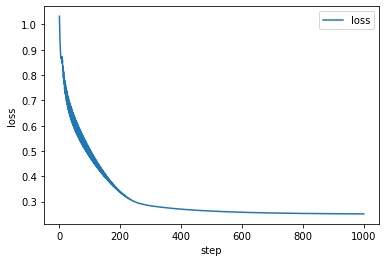

In [200]:
model.loss_plot()

In [201]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [202]:
model.predict(X) == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

This is a basic overview of the math and gradient descent of multiclass logistic regression. Hope you find this article helpful.

By Sophia Yang on April 18, 2021